First importing the required libraries

In [209]:
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import pickle

Importing the dataset from given github link

In [210]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')

In [211]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [212]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

All the columns have no missing values, except "_c39" is having all the missing values, So no requirement of this column and we will drop this columns

In [213]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

The columns are of object, integer or float types

In [214]:
df.drop(['_c39'], axis=1, inplace=True)

In [215]:
df.drop(['policy_number'], axis=1, inplace=True)

We have droped the non required 2 columns as above

In [216]:
df.sample()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
569,165,35,31-12-2012,IL,250/500,500,900.02,6000000,448466,MALE,...,3,YES,69700,6970,6970,55760,BMW,3 Series,2008,N


From the policy bind date, we will extract the month and year and will drop this column, because as per our opinion the day is not required for the fraudulent predictions.

In [217]:
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])

In [218]:
df['Policy_till_Month']=df['policy_bind_date'].dt.strftime('%m')

In [219]:
df['Policy_till_Year']=df['policy_bind_date'].dt.strftime('20%y')

In [220]:
df.sample()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Policy_till_Month,Policy_till_Year
612,56,42,1996-07-07,IL,250/500,500,1339.39,0,471786,FEMALE,...,61490,11180,11180,39130,BMW,X5,1998,N,07,2096


In [221]:
df.drop(['policy_bind_date'], axis=1, inplace=True)

In [222]:
target=df.pop('fraud_reported')

In [223]:
df.shape

(1000, 38)

In [224]:
df.insert(38, 'fraud_reported', target)

In [225]:
df.sample()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,Policy_till_Month,Policy_till_Year,fraud_reported
589,75,25,IL,500/1000,1000,1389.86,0,472475,FEMALE,Associate,...,65100,6510,6510,52080,Saab,93,2011,02,2011,N


Again we have shifted our target variable "fraud_reported" at the last column. And going to drop the "insured_zip" columns also which is not required for our predictions.

In [226]:
df.drop(['insured_zip'], axis=1, inplace=True)

In [227]:
df.sample()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,Policy_till_Month,Policy_till_Year,fraud_reported
861,212,40,IL,500/1000,1000,1524.45,0,FEMALE,Masters,other-service,...,82400,8240,8240,65920,Nissan,Pathfinder,2006,01,2003,N


In [228]:
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


As we observed that the 25% & min values and 75% & max values are closer of many columns, the outliers possibilities are less with this dataset.

In [229]:
le=sklearn.preprocessing.LabelEncoder()

In [230]:
for c in df.select_dtypes(include="object").columns:
    df[c]=le.fit_transform(df[c].astype(str))

In [231]:
df.dtypes

months_as_customer               int64
age                              int64
policy_state                     int32
policy_csl                       int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_hobbies                  int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_date                    int32
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_location                int32
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                  int32
bodily_injuries          

We have converted the object data types features to integer data types by using label encoder for our further ML model making process.

In [232]:
dfcor=df.corr()
dfcor

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,Policy_till_Month,Policy_till_Year,fraud_reported
months_as_customer,1.000000,0.922098,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.060925,-0.000833,0.009814,...,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.005750,0.044674,0.020544
age,0.922098,1.000000,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.073337,0.000969,0.017220,...,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.015501,0.039937,0.012143
policy_state,-0.000328,-0.014533,1.000000,0.001027,0.010033,0.012455,-0.029580,-0.020481,-0.034327,-0.031215,...,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.071450,-0.056325,0.029432
policy_csl,-0.026819,-0.015185,0.001027,1.000000,0.003384,0.023978,0.021636,-0.010757,0.009153,0.015788,...,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.045345,0.025157,-0.037190
policy_deductable,0.026807,0.029188,0.010033,0.003384,1.000000,-0.003245,0.010870,-0.009733,0.015217,-0.046733,...,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,-0.050416,0.051514,0.014817
policy_annual_premium,0.005018,0.014404,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.038853,-0.019715,0.035922,...,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.035355,0.022053,-0.014480
umbrella_limit,0.015498,0.018126,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.010688,-0.019357,0.023422,...,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.009961,0.026463,0.058622
insured_sex,0.060925,0.073337,-0.020481,-0.010757,-0.009733,0.038853,0.010688,1.000000,0.009002,-0.006160,...,-0.023727,0.000924,-0.014868,-0.029609,0.026457,-0.018421,-0.028247,-0.004033,0.037492,0.030873
insured_education_level,-0.000833,0.000969,-0.034327,0.009153,0.015217,-0.019715,-0.019357,0.009002,1.000000,-0.020298,...,0.074226,0.081880,0.055794,0.068348,0.055202,0.049445,0.043509,-0.007118,-0.032210,0.008808
insured_occupation,0.009814,0.017220,-0.031215,0.015788,-0.046733,0.035922,0.023422,-0.006160,-0.020298,1.000000,...,0.003692,0.020211,0.003004,-0.000829,0.042621,0.020584,-0.006676,0.026140,-0.000598,0.001564


<AxesSubplot:>

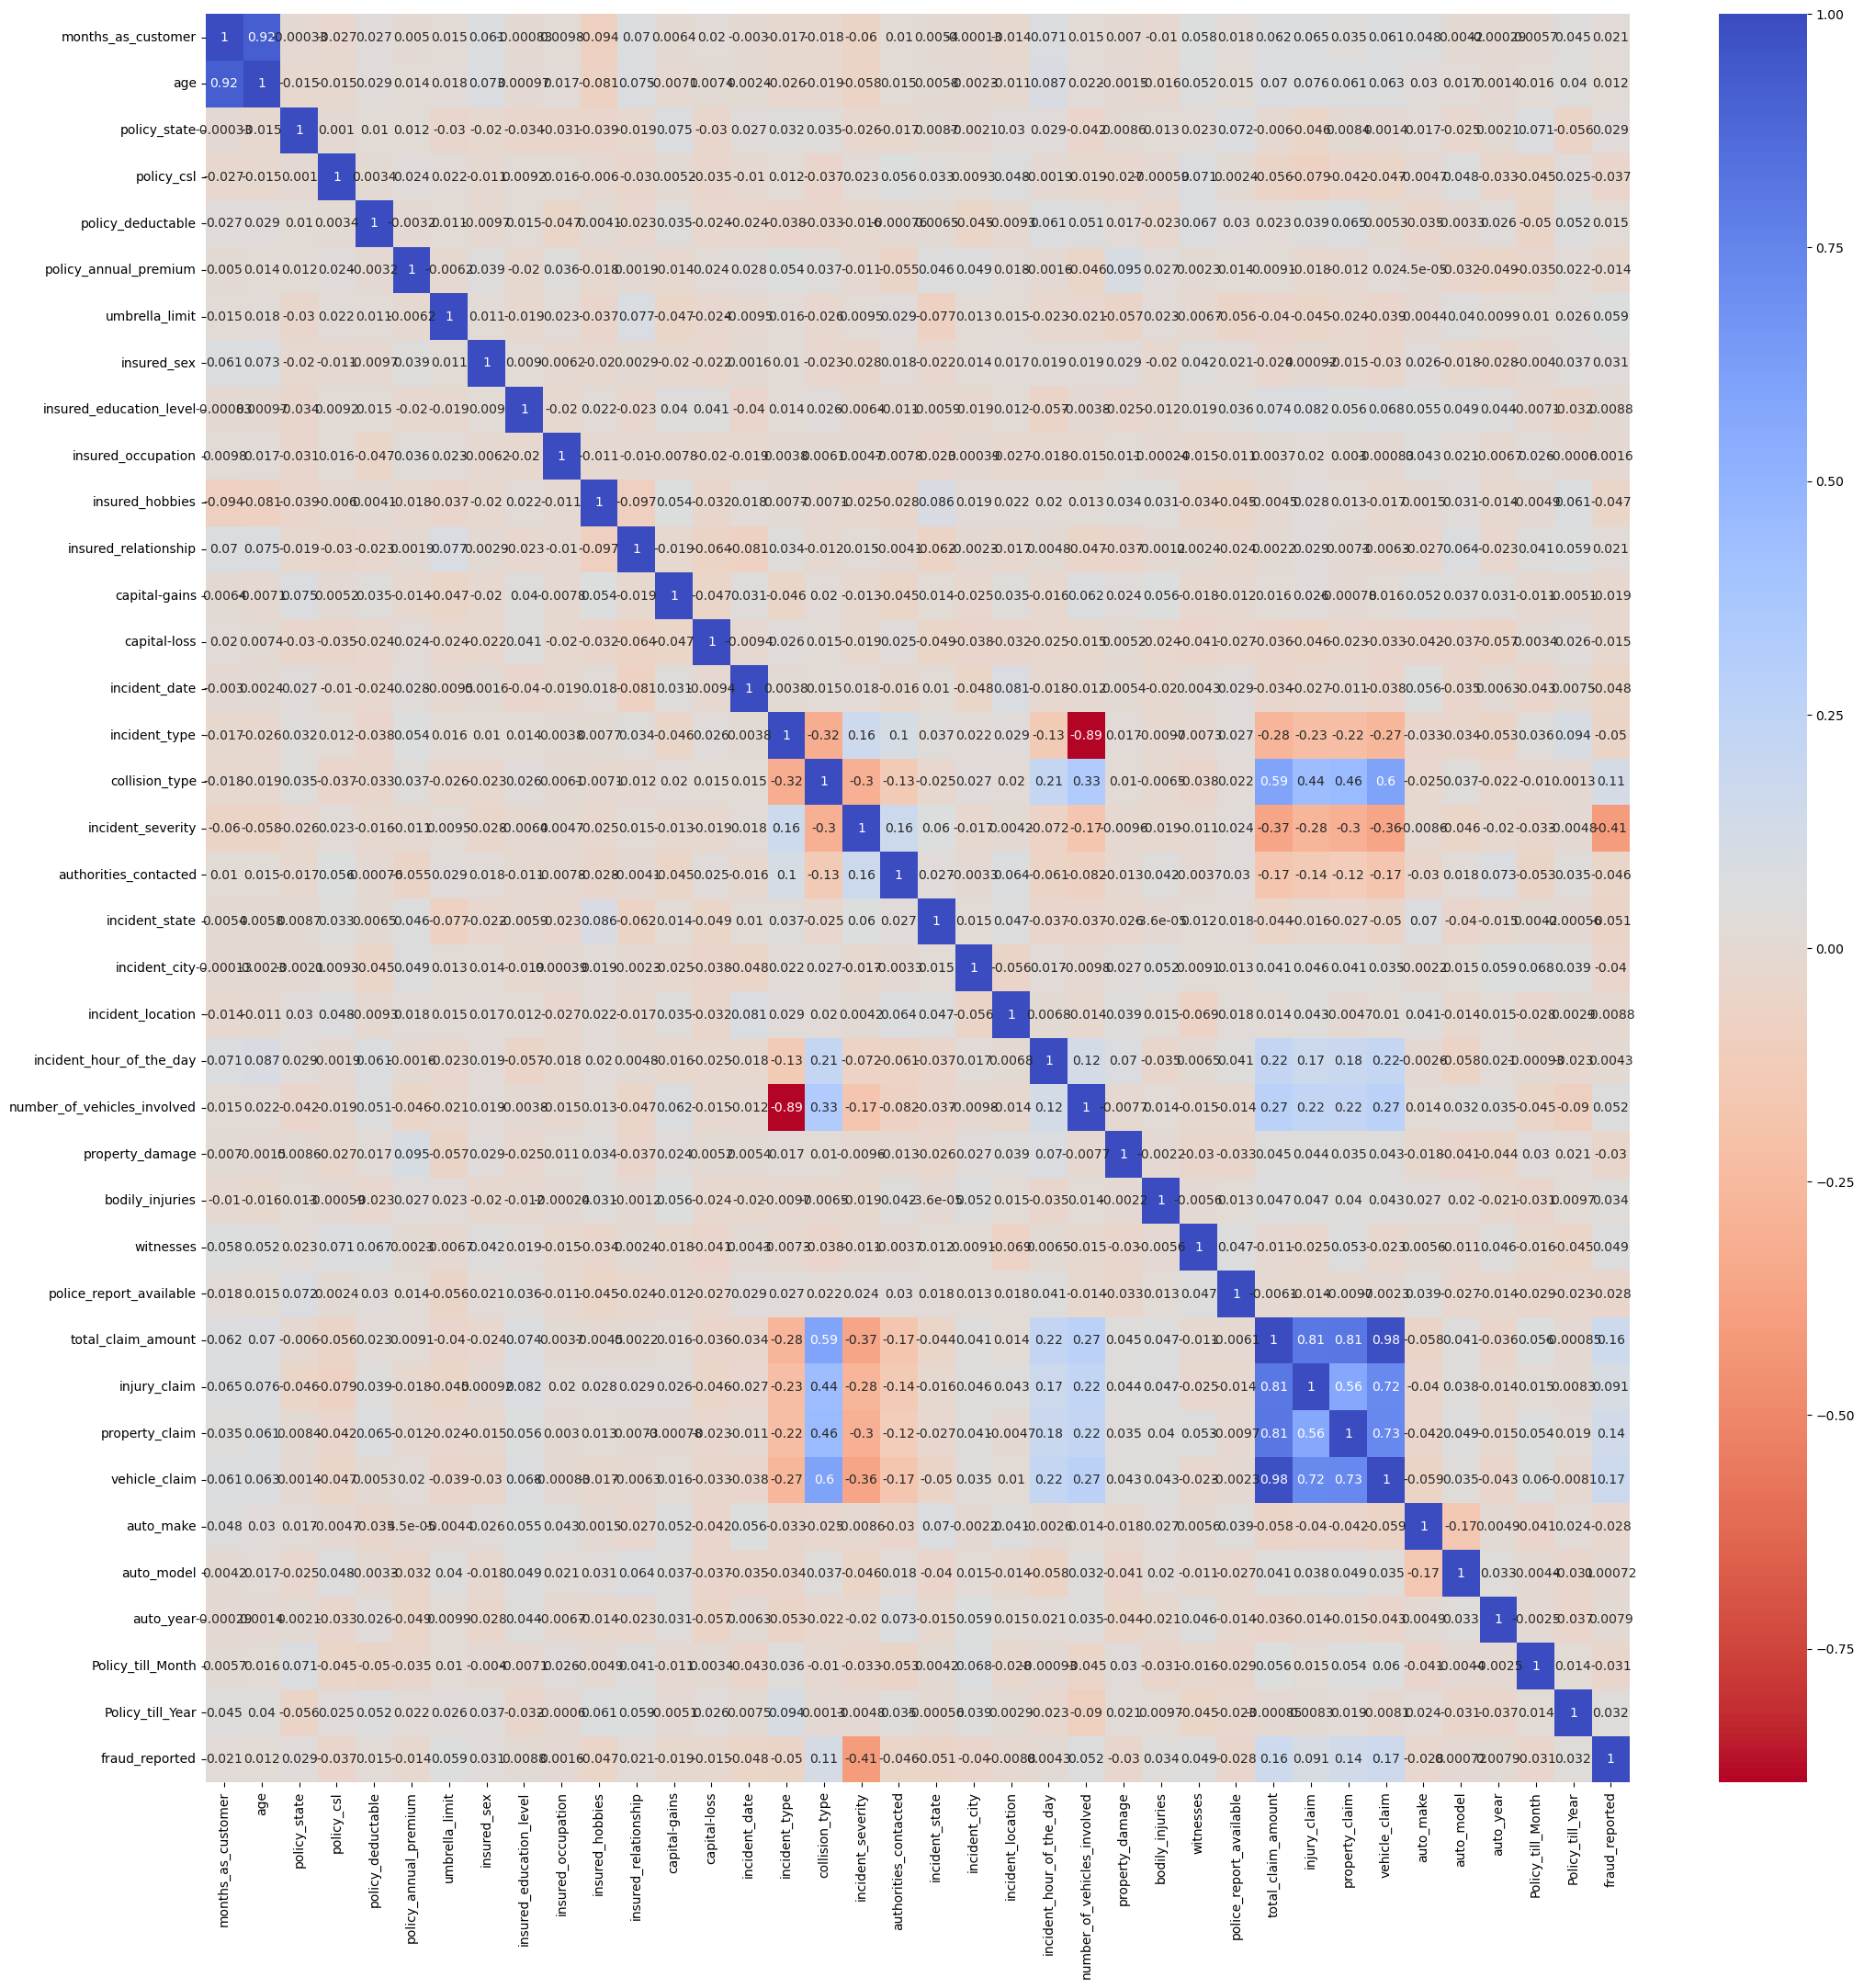

In [233]:
plt.figure(figsize=(25,25))
sns.heatmap(dfcor,annot=True,cmap='coolwarm_r')

Because of the maximum columns the heatmap is not visible perfectly, but it has been observed the almost all the columns are less or more corelated with each other and contributing to our target variable

months_as_customer                AxesSubplot(0.125,0.747241;0.0824468x0.132759)
age                            AxesSubplot(0.223936,0.747241;0.0824468x0.132759)
policy_state                   AxesSubplot(0.322872,0.747241;0.0824468x0.132759)
policy_csl                     AxesSubplot(0.421809,0.747241;0.0824468x0.132759)
policy_deductable              AxesSubplot(0.520745,0.747241;0.0824468x0.132759)
policy_annual_premium          AxesSubplot(0.619681,0.747241;0.0824468x0.132759)
umbrella_limit                 AxesSubplot(0.718617,0.747241;0.0824468x0.132759)
insured_sex                    AxesSubplot(0.817553,0.747241;0.0824468x0.132759)
insured_education_level           AxesSubplot(0.125,0.587931;0.0824468x0.132759)
insured_occupation             AxesSubplot(0.223936,0.587931;0.0824468x0.132759)
insured_hobbies                AxesSubplot(0.322872,0.587931;0.0824468x0.132759)
insured_relationship           AxesSubplot(0.421809,0.587931;0.0824468x0.132759)
capital-gains               

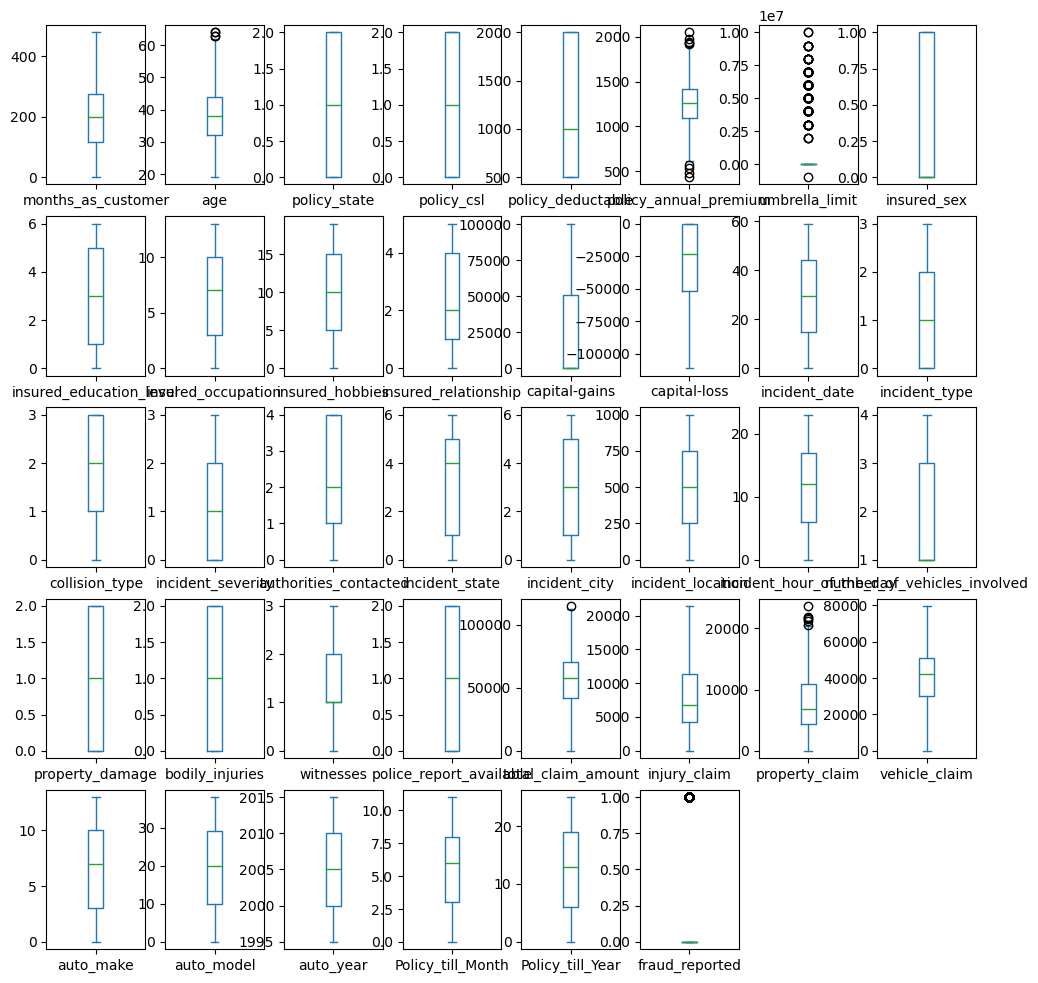

In [234]:
df.plot(kind='box',figsize=(12,12),layout=(5,8),subplots=True)

In [235]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.106418


By above boxplots and skewness checking, we found that its very less outliers and skewness are there. All the features skewness are closer to zero except "umbrella_limit". So we are going to drop this column also.

In [236]:
df.drop(['umbrella_limit'], axis=1, inplace=True)

In [237]:
df.sample()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,Policy_till_Month,Policy_till_Year,fraud_reported
165,108,29,1,2,1000,1337.92,0,6,1,3,...,61380,11160,5580,44640,11,21,2012,3,7,0


In [238]:
z=np.abs(zscore(df))
z

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,Policy_till_Month,Policy_till_Year,fraud_reported
0,1.078140,0.990836,1.187173,0.060937,0.222383,0.616705,1.076953,0.530931,1.158316,1.281737,...,0.714257,0.189283,1.165505,0.749653,0.856466,1.645743,0.183440,1.015026,0.191776,1.746019
1,0.208995,0.334073,0.016856,0.060937,1.412784,0.242521,1.076953,0.530931,0.162558,0.929078,...,1.807312,1.363822,1.372696,1.823346,0.360539,0.657470,0.315491,0.164894,0.866297,1.746019
2,0.608002,1.088913,1.187173,1.182668,1.412784,0.642233,0.928546,1.557877,1.082141,1.363201,...,0.686362,0.054644,0.736072,0.785565,0.631315,0.959702,0.315491,0.164894,1.659851,0.572731
3,0.452355,0.224613,1.220886,0.060937,1.412784,0.652886,0.928546,1.557877,1.407256,1.363201,...,0.403135,0.224130,0.219722,0.677607,0.879279,1.319074,1.479664,0.459874,0.456294,1.746019
4,0.208995,0.552994,1.220886,1.304542,0.222383,1.341980,1.076953,1.522961,1.082141,1.363201,...,1.753121,1.257232,1.399654,1.768252,1.623169,1.049545,0.648112,0.164894,0.191776,0.572731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.746582,0.103769,1.187173,1.304542,0.222383,0.222884,0.928546,1.044404,1.158316,0.576420,...,1.305049,2.051155,0.273817,1.224309,0.135388,1.196528,0.149180,0.130086,0.588553,0.572731
996,0.704407,0.224613,1.220886,1.182668,0.222383,0.739141,0.928546,1.557877,0.584261,1.281737,...,2.111466,2.182342,2.214794,1.821868,1.600357,0.780016,1.645974,0.459874,0.191776,0.572731
997,0.642767,0.541611,1.187173,0.060937,1.039966,0.520739,0.928546,1.044404,1.407256,1.186872,...,0.558507,0.013648,0.020826,0.771902,1.104430,0.028570,1.513924,1.344813,1.263074,0.572731
998,2.208028,2.523284,1.220886,1.304542,1.412784,0.411866,1.076953,1.522961,0.411497,1.715859,...,0.219110,0.453708,0.451976,0.073580,1.375206,1.286371,1.181303,1.310006,0.205002,0.572731


In [239]:
cleaned_df=df[(z<3).all(axis=1)]
cleaned_df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,Policy_till_Month,Policy_till_Year,fraud_reported
0,328,48,2,1,1000,1406.91,1,4,2,17,...,71610,6510,13020,52080,10,1,2004,9,14,1
1,228,42,1,1,2000,1197.22,1,4,6,15,...,5070,780,780,3510,8,12,2007,5,6,1
2,134,29,2,0,2000,1413.14,0,6,11,2,...,34650,7700,3850,23100,4,30,2007,5,0,0
3,256,41,0,1,2000,1415.74,0,6,1,2,...,63400,6340,6340,50720,3,34,2014,4,16,1
4,228,44,0,2,1000,1583.91,1,0,11,2,...,6500,1300,650,4550,0,31,2009,5,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,2,1000,1310.80,0,5,2,13,...,87200,17440,8720,61040,6,6,2006,6,17,0
996,285,41,0,0,1000,1436.79,0,6,9,17,...,108480,18080,18080,72320,13,28,2015,4,14,0
997,130,34,2,1,500,1383.49,0,5,1,3,...,67500,7500,7500,52500,11,19,1996,1,3,0
998,458,62,0,2,2000,1356.92,1,0,5,0,...,46980,5220,5220,36540,1,5,1998,10,11,0


In [240]:
df.shape

(1000, 37)

In [241]:
cleaned_df.shape

(995, 37)

By using the zscore method we have cleaned our dataset by removing the data of more than 3 zscore value both sides with absolute positive method. And lost on 0.5% of our data.

In [242]:
x=cleaned_df.iloc[:,0:-1]

In [243]:
y=cleaned_df.iloc[:,-1]

In [244]:
x.shape

(995, 36)

In [245]:
y.shape

(995,)

We have separated the independent & target variables and going to use different classification algorithms along with many random states to check and get the best.

In [246]:
lg=LogisticRegression()

In [247]:
for i in range(0,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=i)
    lg.fit(xtrain,ytrain)
    pred1=lg.predict(xtest)
    ascore=accuracy_score(ytest,pred1)
    print(ascore)

0.7324414715719063
0.7692307692307693
0.745819397993311
0.745819397993311
0.7625418060200669
0.745819397993311
0.7491638795986622
0.7725752508361204
0.7558528428093646
0.7725752508361204
0.7658862876254181
0.7658862876254181
0.7391304347826086
0.7290969899665551
0.7759197324414716
0.7525083612040134
0.7525083612040134
0.7759197324414716
0.7625418060200669
0.745819397993311
0.7792642140468228
0.745819397993311
0.7391304347826086
0.7290969899665551
0.7290969899665551
0.7357859531772575
0.7792642140468228
0.7525083612040134
0.7926421404682275
0.7725752508361204
0.7926421404682275
0.7658862876254181
0.7391304347826086
0.7324414715719063
0.7591973244147158
0.7725752508361204
0.745819397993311
0.7224080267558528
0.7692307692307693
0.7591973244147158
0.725752508361204
0.7391304347826086
0.745819397993311
0.7491638795986622
0.7290969899665551
0.7658862876254181
0.745819397993311
0.7558528428093646
0.705685618729097
0.7658862876254181


In [248]:
dt=DecisionTreeClassifier()

In [249]:
for i in range(0,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=i)
    dt.fit(xtrain,ytrain)
    pred2=dt.predict(xtest)
    ascore=accuracy_score(ytest,pred2)
    print(ascore)

0.7792642140468228
0.7892976588628763
0.7792642140468228
0.7759197324414716
0.7759197324414716
0.7658862876254181
0.8260869565217391
0.7725752508361204
0.7525083612040134
0.7692307692307693
0.7926421404682275
0.7525083612040134
0.7692307692307693
0.7759197324414716
0.7759197324414716
0.7792642140468228
0.7892976588628763
0.7725752508361204
0.7591973244147158
0.7525083612040134
0.8127090301003345
0.7859531772575251
0.782608695652174
0.7558528428093646
0.7859531772575251
0.7424749163879598
0.7959866220735786
0.7959866220735786
0.7692307692307693
0.7424749163879598
0.7558528428093646
0.7859531772575251
0.7625418060200669
0.7558528428093646
0.7491638795986622
0.7725752508361204
0.7591973244147158
0.7926421404682275
0.7491638795986622
0.7391304347826086
0.7725752508361204
0.7792642140468228
0.7424749163879598
0.8060200668896321
0.7859531772575251
0.7892976588628763
0.7959866220735786
0.7324414715719063
0.7525083612040134
0.7658862876254181


In [250]:
rf=RandomForestClassifier()

In [251]:
for i in range(0,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=i)
    rf.fit(xtrain,ytrain)
    pred3=rf.predict(xtest)
    ascore=accuracy_score(ytest,pred3)
    print(ascore)

0.7658862876254181
0.7892976588628763
0.7725752508361204
0.782608695652174
0.7725752508361204
0.7591973244147158
0.7759197324414716
0.8060200668896321
0.7658862876254181
0.8160535117056856
0.7993311036789298
0.7792642140468228
0.7759197324414716
0.7759197324414716
0.7993311036789298
0.7792642140468228
0.7692307692307693
0.7491638795986622
0.7625418060200669
0.7725752508361204
0.8294314381270903
0.7591973244147158
0.7190635451505016
0.7625418060200669
0.7625418060200669
0.782608695652174
0.8160535117056856
0.7993311036789298
0.7859531772575251
0.7658862876254181
0.7926421404682275
0.7558528428093646
0.7859531772575251
0.7792642140468228
0.7725752508361204
0.8060200668896321
0.7658862876254181
0.745819397993311
0.7725752508361204
0.7725752508361204
0.7658862876254181
0.7491638795986622
0.7725752508361204
0.782608695652174
0.7591973244147158
0.7692307692307693
0.7591973244147158
0.782608695652174
0.7324414715719063
0.7792642140468228


In [252]:
kn=KNeighborsClassifier()

In [253]:
for i in range(0,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=i)
    kn.fit(xtrain,ytrain)
    pred4=kn.predict(xtest)
    ascore=accuracy_score(ytest,pred4)
    print(ascore)

0.6755852842809364
0.7123745819397993
0.7157190635451505
0.7123745819397993
0.7190635451505016
0.6655518394648829
0.6822742474916388
0.6989966555183946
0.725752508361204
0.705685618729097
0.6889632107023411
0.6956521739130435
0.6655518394648829
0.6688963210702341
0.725752508361204
0.6889632107023411
0.7090301003344481
0.7491638795986622
0.705685618729097
0.68561872909699
0.6889632107023411
0.6622073578595318
0.6789297658862876
0.6923076923076923
0.6822742474916388
0.6989966555183946
0.7357859531772575
0.7123745819397993
0.7391304347826086
0.7190635451505016
0.7324414715719063
0.705685618729097
0.6923076923076923
0.6521739130434783
0.6989966555183946
0.7090301003344481
0.6989966555183946
0.6722408026755853
0.7023411371237458
0.7157190635451505
0.6956521739130435
0.6822742474916388
0.6688963210702341
0.6722408026755853
0.6555183946488294
0.7023411371237458
0.6923076923076923
0.68561872909699
0.68561872909699
0.7190635451505016


In [254]:
rg=RidgeClassifier()

In [255]:
for i in range(0,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=i)
    rg.fit(xtrain,ytrain)
    pred5=rg.predict(xtest)
    ascore=accuracy_score(ytest,pred5)
    print(ascore)

0.7357859531772575
0.7591973244147158
0.7591973244147158
0.7525083612040134
0.7491638795986622
0.7525083612040134
0.7892976588628763
0.7792642140468228
0.745819397993311
0.7892976588628763
0.7759197324414716
0.7558528428093646
0.7324414715719063
0.7290969899665551
0.7759197324414716
0.782608695652174
0.7792642140468228
0.782608695652174
0.7625418060200669
0.7792642140468228
0.7993311036789298
0.7658862876254181
0.7424749163879598
0.7424749163879598
0.7525083612040134
0.745819397993311
0.7859531772575251
0.7625418060200669
0.7993311036789298
0.7725752508361204
0.7625418060200669
0.7792642140468228
0.7692307692307693
0.7525083612040134
0.7625418060200669
0.782608695652174
0.7558528428093646
0.7290969899665551
0.7692307692307693
0.7725752508361204
0.7424749163879598
0.7491638795986622
0.7525083612040134
0.7591973244147158
0.7424749163879598
0.7725752508361204
0.7558528428093646
0.7759197324414716
0.6956521739130435
0.7658862876254181


In [256]:
sg=SGDClassifier()

In [257]:
for i in range(0,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=i)
    sg.fit(xtrain,ytrain)
    pred6=sg.predict(xtest)
    ascore=accuracy_score(ytest,pred6)
    print(ascore)

0.7190635451505016
0.7591973244147158
0.7157190635451505
0.48494983277591974
0.7591973244147158
0.44481605351170567
0.7157190635451505
0.7759197324414716
0.3311036789297659
0.7190635451505016
0.6755852842809364
0.7658862876254181
0.7391304347826086
0.7224080267558528
0.7023411371237458
0.7525083612040134
0.7525083612040134
0.7759197324414716
0.3210702341137124
0.33444816053511706
0.7859531772575251
0.3311036789297659
0.3979933110367893
0.7290969899665551
0.7290969899665551
0.3377926421404682
0.7725752508361204
0.7525083612040134
0.6722408026755853
0.4983277591973244
0.3511705685618729
0.41471571906354515
0.7424749163879598
0.7324414715719063
0.7591973244147158
0.7759197324414716
0.6120401337792643
0.49498327759197325
0.7759197324414716
0.745819397993311
0.6020066889632107
0.3745819397993311
0.6989966555183946
0.7491638795986622
0.48494983277591974
0.5585284280936454
0.4080267558528428
0.7525083612040134
0.7023411371237458
0.7658862876254181


In [258]:
br=BernoulliNB()

In [259]:
for i in range(0,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=i)
    br.fit(xtrain,ytrain)
    pred7=br.predict(xtest)
    ascore=accuracy_score(ytest,pred7)
    print(ascore)

0.782608695652174
0.8127090301003345
0.7993311036789298
0.822742474916388
0.8093645484949833
0.7959866220735786
0.7993311036789298
0.8193979933110368
0.7759197324414716
0.842809364548495
0.8394648829431438
0.7859531772575251
0.7926421404682275
0.7692307692307693
0.7892976588628763
0.8327759197324415
0.7993311036789298
0.7926421404682275
0.8093645484949833
0.8127090301003345
0.8494983277591973
0.7959866220735786
0.7725752508361204
0.7692307692307693
0.782608695652174
0.8193979933110368
0.8361204013377926
0.7993311036789298
0.8093645484949833
0.8327759197324415
0.802675585284281
0.8160535117056856
0.822742474916388
0.7892976588628763
0.802675585284281
0.8093645484949833
0.8127090301003345
0.7859531772575251
0.7993311036789298
0.8127090301003345
0.8093645484949833
0.8193979933110368
0.8160535117056856
0.7926421404682275
0.7926421404682275
0.7859531772575251
0.8060200668896321
0.8361204013377926
0.7692307692307693
0.782608695652174


In [260]:
gn=GaussianNB()

In [261]:
for i in range(0,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=i)
    gn.fit(xtrain,ytrain)
    pred8=gn.predict(xtest)
    ascore=accuracy_score(ytest,pred8)
    print(ascore)

0.6889632107023411
0.7224080267558528
0.7224080267558528
0.7190635451505016
0.7290969899665551
0.6488294314381271
0.6956521739130435
0.6822742474916388
0.7357859531772575
0.6655518394648829
0.6588628762541806
0.6521739130434783
0.725752508361204
0.6722408026755853
0.7190635451505016
0.725752508361204
0.6622073578595318
0.6421404682274248
0.725752508361204
0.6187290969899666
0.6822742474916388
0.6588628762541806
0.6956521739130435
0.68561872909699
0.6755852842809364
0.7090301003344481
0.725752508361204
0.6755852842809364
0.6688963210702341
0.6454849498327759
0.705685618729097
0.6387959866220736
0.7792642140468228
0.6923076923076923
0.6488294314381271
0.6655518394648829
0.705685618729097
0.6688963210702341
0.7424749163879598
0.7290969899665551
0.6989966555183946
0.5953177257525084
0.6989966555183946
0.6722408026755853
0.6655518394648829
0.6655518394648829
0.6622073578595318
0.6755852842809364
0.6321070234113713
0.6655518394648829


Among all above Algos, we found BernoulliNB giving better results. So we will use this one for our further Cross Validation and Hyperparameter Tuning process for making the best possible ML Model.

In [262]:
cv1=cross_val_score(br,x,y,cv=KFold(n_splits=10))

In [263]:
cv1

array([0.77      , 0.82      , 0.76      , 0.79      , 0.77      ,
       0.76767677, 0.80808081, 0.86868687, 0.88888889, 0.7979798 ])

In [264]:
cv1.mean()

0.8041313131313131

In [265]:
cv2=cross_val_score(br,x,y,cv=StratifiedKFold(n_splits=10))

In [266]:
cv2

array([0.78      , 0.83      , 0.75      , 0.82      , 0.77      ,
       0.74747475, 0.7979798 , 0.87878788, 0.86868687, 0.7979798 ])

In [267]:
cv2.mean()

0.8040909090909091

In [268]:
cv3=cross_val_score(br,x,y,cv=ShuffleSplit(train_size=0.7,test_size=0.3,n_splits=10))

In [269]:
cv3

array([0.81605351, 0.7826087 , 0.83277592, 0.75919732, 0.82943144,
       0.81605351, 0.80602007, 0.78595318, 0.81270903, 0.81605351])

In [270]:
cv3.mean()

0.805685618729097

All the above Cross Validation methods, are giving more than 80% accurate predictions.

In [271]:
gs=GridSearchCV(estimator=br,param_grid={'alpha':[0.1],'binarize':[0.2],'fit_prior':[True]},scoring='accuracy',cv=10,n_jobs=-1)

In [272]:
gs.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=BernoulliNB(), n_jobs=-1,
             param_grid={'alpha': [0.1], 'binarize': [0.2],
                         'fit_prior': [True]},
             scoring='accuracy')

In [273]:
HyPred=gs.best_estimator_.predict(xtest)

In [274]:
accuracy_score(ytest,HyPred)

0.782608695652174

In [275]:
confusion_matrix(ytest,HyPred)

array([[194,  35],
       [ 30,  40]], dtype=int64)

By using the BernoulliNB with Hyperparameter Tuning, we are getting the prediction accuracy of above 78% with the managable confustion matrix along with higher True Positive & False Positive values.

So we are going to save our above gs ML model

In [276]:
pickle.dump(gs, open('Fraud_Reported', 'wb'))

In [277]:
gs_model=pickle.load(open('Fraud_Reported', 'rb'))

In [278]:
model_pred=gs_model.predict(xtest)

In [279]:
accuracy_score(ytest,model_pred)

0.782608695652174

Our Insurance Claim Fraud Detection ML Model is saved with above 78% Prediction Accuracy. With Cross Validation of above 80% Prediction Accuracy.